In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
mr1 = pd.read_csv('marathon_results_2015.csv')
mr2 = pd.read_csv('marathon_results_2015.csv')
mr3 = pd.read_csv('marathon_results_2015.csv')

In [3]:
df = pd.concat([mr1,mr2,mr3], join = 'inner')
df.head()

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,NaN,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,NaN,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5


In [4]:
df.columns

Index(['Unnamed: 0', 'Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country',
       'Citizen', 'Unnamed: 9', '5K', '10K', '15K', '20K', 'Half', '25K',
       '30K', '35K', '40K', 'Pace', 'Proj Time', 'Official Time', 'Overall',
       'Gender', 'Division'],
      dtype='object')

In [5]:
df = df.drop(['Unnamed: 0','Unnamed: 9'], axis = 1)
df.shape

(79794, 23)

In [6]:
df.columns

Index(['Bib', 'Name', 'Age', 'M/F', 'City', 'State', 'Country', 'Citizen',
       '5K', '10K', '15K', '20K', 'Half', '25K', '30K', '35K', '40K', 'Pace',
       'Proj Time', 'Official Time', 'Overall', 'Gender', 'Division'],
      dtype='object')

In [7]:
df

,Bib,Name,Age,M/F,City,State,Country,Citizen,5K,10K,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,3,"Desisa, Lelisa",25,M,Ambo,NaN,ETH,NaN,0:14:43,0:29:43,...,1:16:07,1:32:00,1:47:59,2:02:39,0:04:56,-,2:09:17,1,1,1
1,4,"Tsegay, Yemane Adhane",30,M,Addis Ababa,NaN,ETH,NaN,0:14:43,0:29:43,...,1:16:07,1:31:59,1:47:59,2:02:42,0:04:58,-,2:09:48,2,2,2
2,8,"Chebet, Wilson",29,M,Marakwet,NaN,KEN,NaN,0:14:43,0:29:43,...,1:16:07,1:32:00,1:47:59,2:03:01,0:04:59,-,2:10:22,3,3,3
3,11,"Kipyego, Bernard",28,M,Eldoret,NaN,KEN,NaN,0:14:43,0:29:44,...,1:16:07,1:32:00,1:48:03,2:03:47,0:05:00,-,2:10:47,4,4,4
4,10,"Korir, Wesley",32,M,Kitale,NaN,KEN,NaN,0:14:43,0:29:44,...,1:16:07,1:32:00,1:47:59,2:03:27,0:05:00,-,2:10:49,5,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26593,25656,"Prescott, Francine J.",64,F,Boynton Beach,FL,USA,NaN,0:50:15,1:43:31,...,4:25:53,5:19:44,6:17:19,7:13:34,0:17:31,-,7:38:56,26594,12015,269
26594,31359,"Emerson, Annette C.",61,F,Old Town,ME,USA,NaN,0:48:36,1:39:39,...,4:32:44,5:31:58,6:28:56,7:26:19,0:17:59,-,7:51:30,26595,12016,270
26595,25559,"Cerveny, Nona",66,F,Scottsdale,AZ,USA,NaN,0:53:03,1:47:16,...,4:33:51,5:38:56,6:38:51,7:36:18,0:18:18,-,7:59:33,26596,12017,91
26596,29396,"Buccilli, Alfred P.",53,M,Lynnfield,MA,USA,NaN,0:49:04,1:40:12,...,4:29:20,5:31:11,6:33:35,7:35:38,0:18:20,-,8:00:37,26597,14580,2055


In [8]:
X = df[['Pace']] # Independent Variable
y = df[['Official Time']] # Dependent Variable

In [9]:
X

,Pace
0,0:04:56
1,0:04:58
2,0:04:59
3,0:05:00
4,0:05:00
...,...
26593,0:17:31
26594,0:17:59
26595,0:18:18
26596,0:18:20


In [10]:
# Converting Pace as timestamp into hr, min, sec
def pace_to_time(pace):
    hr, min, sec = map(float, pace.split(':'))
    return hr * 3600 + min * 60 + sec

X['Pace'] = X['Pace'].apply(pace_to_time)

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_3648\3536130141.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Pace'] = X['Pace'].apply(pace_to_time)


In [11]:
y

,Official Time
0,2:09:17
1,2:09:48
2,2:10:22
3,2:10:47
4,2:10:49
...,...
26593,7:38:56
26594,7:51:30
26595,7:59:33
26596,8:00:37


In [12]:
y['Official Time'] = y['Official Time'].apply(pace_to_time)

C:\Users\Administrator.DAI-PC2\AppData\Local\Temp\ipykernel_3648\489693757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Official Time'] = y['Official Time'].apply(pace_to_time)


In [13]:
X['Pace']

0         296.0
1         298.0
2         299.0
3         300.0
4         300.0
          ...  
26593    1051.0
26594    1079.0
26595    1098.0
26596    1100.0
26597    1113.0
Name: Pace, Length: 79794, dtype: float64

In [14]:
y['Official Time']

0         7757.0
1         7788.0
2         7822.0
3         7847.0
4         7849.0
          ...   
26593    27536.0
26594    28290.0
26595    28773.0
26596    28837.0
26597    29161.0
Name: Official Time, Length: 79794, dtype: float64

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [17]:
y_pred = model.predict(X_test)
print(y_pred)

[[13410.80776676]
 [13306.11129333]
 [10688.69945769]
 ...
 [17415.44787529]
 [12861.15128127]
 [20320.77501285]]


In [18]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

In [19]:
print("R-Squared: ", r2)
print("Mean Absolute Error (MAE): ", mae)
print("Mean squared Error (MSE): ", mse)
print("Root Mean Squared Error (RMSE): ", rmse)

R-Squared:  0.9965296018425304
Mean Absolute Error (MAE):  8.401084706886325
Mean squared Error (MSE):  20344.446542083264
Root Mean Squared Error (RMSE):  142.63395998878832


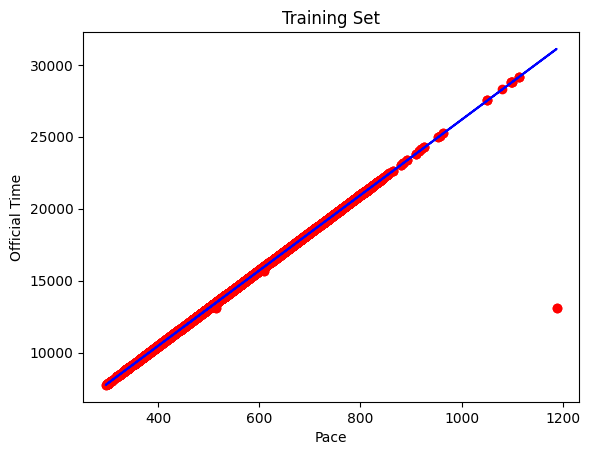

In [20]:
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Training Set')
plt.xlabel('Pace')
plt.ylabel('Official Time')
plt.show()

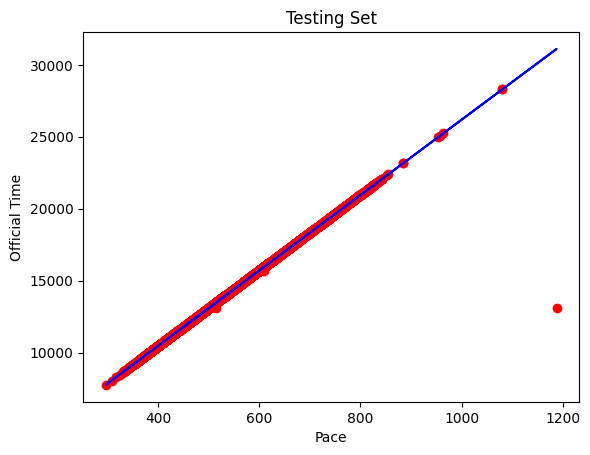

In [21]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, model.predict(X_train), color = 'blue')
plt.title('Testing Set')
plt.xlabel('Pace')
plt.ylabel('Official Time')
plt.show()

In [22]:
print('***Making predictions for new data***')
prediction = ['0:15:25', '1:15:26', '0:36:73']

for i in prediction:
  print(f'Pace: {pace_to_time(i)}...Official Time: {model.predict([[pace_to_time(i)]])}')

***Making predictions for new data***
Pace: 925.0...Official Time: [[24220.71864796]]
Pace: 4526.0...Official Time: [[118473.71884941]]
Pace: 2233.0...Official Time: [[58456.46545815]]


c:\Users\Administrator.DAI-PC2\anaconda3\envs\New\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\envs\New\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\Administrator.DAI-PC2\anaconda3\envs\New\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
import joblib

joblib.dump(model, 'final_time_model.pkl')

['final_time_model.pkl']

In [24]:
print(X)
print(X.columns)
print(list(X.columns))

         Pace
0       296.0
1       298.0
2       299.0
3       300.0
4       300.0
...       ...
26593  1051.0
26594  1079.0
26595  1098.0
26596  1100.0
26597  1113.0

[79794 rows x 1 columns]
Index(['Pace'], dtype='object')
['Pace']


In [25]:
joblib.dump(list(X.columns), 'pace_column_names.pkl')

['pace_column_names.pkl']